# Binary Classification problem - XGBoost

In [3]:
# Install xgboost in notebook instance.
conda install -c anaconda py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/jaydip/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1g             |       h1de35cc_0         3.4 MB  anaconda
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following packages will be UPDATED:

  certifi              pkgs/main::certifi-2020.4.5.1-py37_0 --> anaconda::certifi-2020.6.20-py37_0
  openssl              pkgs/main::openssl-1.1.1f-h1de35cc_0 --> anaconda::openssl-1.1.1g-h1de35cc_0

The following packages will be SUPERSEDED by

In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
column_list_file = 'FraudDetection_train_column_list.txt'
train_file = 'FraudDetection_train.csv'
validation_file = 'FraudDetection_validation.csv'

In [7]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [8]:
columns

['Class',
 'Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [9]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [10]:
df_train.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,34681.0,-0.231080,-3.201858,-0.674366,-0.976167,-1.302294,0.626642,0.277071,-0.024488,...,1.554458,0.534381,0.005080,-0.955780,-1.220134,0.293517,0.145976,-0.094032,0.145491,810.00
1,0,48420.0,-0.295889,2.179398,-2.701905,1.295084,0.964631,-1.468709,0.915544,-0.131907,...,0.531109,-0.419695,-0.499968,0.023681,-0.857532,-0.217494,-0.378829,0.221622,-0.228443,26.99
2,0,146896.0,-1.233770,0.550555,0.149961,-0.533041,2.583473,-0.171465,1.439288,-0.056200,...,0.217847,0.107964,-0.085211,-0.458799,-0.361393,1.408680,-0.546275,-0.062782,0.042367,60.00
3,0,76786.0,1.192163,0.338580,0.421319,0.716534,-0.316889,-0.782785,0.034351,-0.102277,...,-0.106350,-0.235795,-0.631416,0.196427,0.367923,0.109944,0.103053,-0.004102,0.031178,0.89
4,0,140239.0,0.135040,0.252836,0.877346,-0.661467,-0.021139,0.146843,0.261205,0.075865,...,0.021391,0.304161,0.994559,0.000093,0.691837,-0.399797,0.640899,0.004513,0.012159,47.59


In [11]:
df_validation.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,19927.0,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,...,-0.068674,0.104104,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99
1,0,147501.0,0.203176,0.866949,-0.662289,-0.313658,0.995257,-0.772470,1.001925,-0.173115,...,0.005624,0.347564,1.066452,-0.212545,-0.557734,-0.331202,-0.148769,0.133514,0.120215,31.46
2,0,163799.0,-4.170932,4.055960,-2.406906,-2.328540,0.749641,-1.259002,1.933041,-0.528192,...,2.296691,-0.590307,0.822610,-0.222509,0.724525,0.269168,-0.222745,-0.538198,-1.750828,0.77
3,0,124538.0,-1.705530,0.524142,0.802349,-3.162769,-1.325460,-0.693877,-0.332172,-0.342372,...,-0.146804,-0.289259,-0.310118,0.136799,-0.024112,-0.884707,-0.760579,-0.910401,-0.034618,20.00
4,0,4517.0,-2.541875,2.598099,0.326163,-0.178483,-0.249484,-0.627127,0.347217,0.258470,...,0.936665,-0.671804,-0.910709,0.187819,-0.067745,0.177598,0.078029,0.790667,0.358625,13.48


In [12]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [13]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://xgboost.readthedocs.io/en/latest/parameter.html
classifier = xgb.XGBClassifier (objective="binary:logistic")

In [14]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
classifier.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'],
               early_stopping_rounds=10)

[0]	validation_0-logloss:0.599684	validation_1-logloss:0.598086
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.52143	validation_1-logloss:0.520245
[2]	validation_0-logloss:0.455798	validation_1-logloss:0.456186
[3]	validation_0-logloss:0.401409	validation_1-logloss:0.401185
[4]	validation_0-logloss:0.35496	validation_1-logloss:0.354363
[5]	validation_0-logloss:0.313988	validation_1-logloss:0.314685
[6]	validation_0-logloss:0.279057	validation_1-logloss:0.279663
[7]	validation_0-logloss:0.24956	validation_1-logloss:0.249028
[8]	validation_0-logloss:0.222389	validation_1-logloss:0.222399
[9]	validation_0-logloss:0.198856	validation_1-logloss:0.199077
[10]	validation_0-logloss:0.178212	validation_1-logloss:0.178121
[11]	validation_0-logloss:0.159352	validation_1-logloss:0.1597
[12]	validation_0-logloss:0.143528	validation_1-logloss:0.143587
[13]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
eval_result = classifier.evals_result()

In [17]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [18]:
print(training_rounds)

range(0, 100)


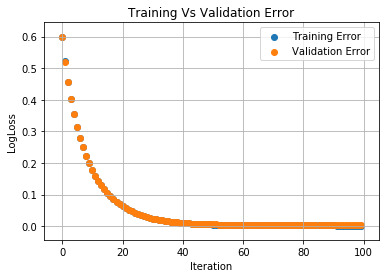

In [20]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [22]:
df = pd.read_csv(validation_file,names=columns)

In [23]:
df.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,19927.0,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,...,-0.068674,0.104104,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99
1,0,147501.0,0.203176,0.866949,-0.662289,-0.313658,0.995257,-0.772470,1.001925,-0.173115,...,0.005624,0.347564,1.066452,-0.212545,-0.557734,-0.331202,-0.148769,0.133514,0.120215,31.46
2,0,163799.0,-4.170932,4.055960,-2.406906,-2.328540,0.749641,-1.259002,1.933041,-0.528192,...,2.296691,-0.590307,0.822610,-0.222509,0.724525,0.269168,-0.222745,-0.538198,-1.750828,0.77
3,0,124538.0,-1.705530,0.524142,0.802349,-3.162769,-1.325460,-0.693877,-0.332172,-0.342372,...,-0.146804,-0.289259,-0.310118,0.136799,-0.024112,-0.884707,-0.760579,-0.910401,-0.034618,20.00
4,0,4517.0,-2.541875,2.598099,0.326163,-0.178483,-0.249484,-0.627127,0.347217,0.258470,...,0.936665,-0.671804,-0.910709,0.187819,-0.067745,0.177598,0.078029,0.790667,0.358625,13.48


In [24]:
X_test = df.iloc[:,1:]

In [25]:
result = classifier.predict(X_test)

In [26]:
result[:5]

array([0, 0, 0, 0, 0])

In [27]:
df['predicted_class'] = result

In [28]:
df.head()

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,predicted_class
0,0,19927.0,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,...,0.104104,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99,0
1,0,147501.0,0.203176,0.866949,-0.662289,-0.313658,0.995257,-0.772470,1.001925,-0.173115,...,0.347564,1.066452,-0.212545,-0.557734,-0.331202,-0.148769,0.133514,0.120215,31.46,0
2,0,163799.0,-4.170932,4.055960,-2.406906,-2.328540,0.749641,-1.259002,1.933041,-0.528192,...,-0.590307,0.822610,-0.222509,0.724525,0.269168,-0.222745,-0.538198,-1.750828,0.77,0
3,0,124538.0,-1.705530,0.524142,0.802349,-3.162769,-1.325460,-0.693877,-0.332172,-0.342372,...,-0.289259,-0.310118,0.136799,-0.024112,-0.884707,-0.760579,-0.910401,-0.034618,20.00,0
4,0,4517.0,-2.541875,2.598099,0.326163,-0.178483,-0.249484,-0.627127,0.347217,0.258470,...,-0.671804,-0.910709,0.187819,-0.067745,0.177598,0.078029,0.790667,0.358625,13.48,0


# Binary Classifier Metrics

In [29]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [30]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [31]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['Class'], df['predicted_class'],labels=[1,0])

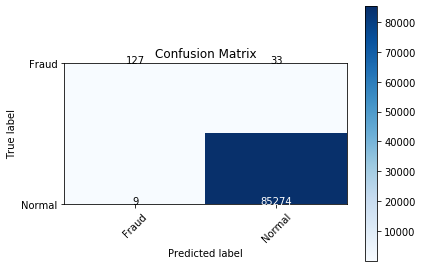

In [34]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Normal'],
                      title='Confusion Matrix')

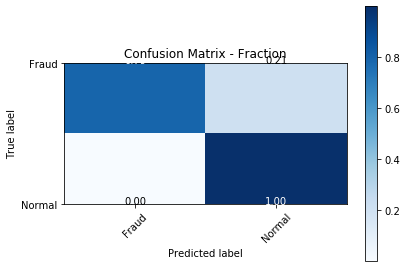

In [35]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Normal'],
                      title='Confusion Matrix - Fraction', normalize=True)

In [36]:
metrics = [binary_classifier_metrics(df['Class'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [37]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model,127,85274,9,33,160,85283,0.79375,0.999894,0.933824,0.999508,0.000106,0.20625,0.858108


In [38]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model           127             33              9         85274

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model    0.79               0.21                0.0               1.0

       Precision  Accuracy    F1
Model       0.93       1.0  0.86


In [40]:
print(classification_report(
    df['Class'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Fraud','Normal']))

              precision    recall  f1-score   support

       Fraud       0.93      0.79      0.86       160
      Normal       1.00      1.00      1.00     85283

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

